In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


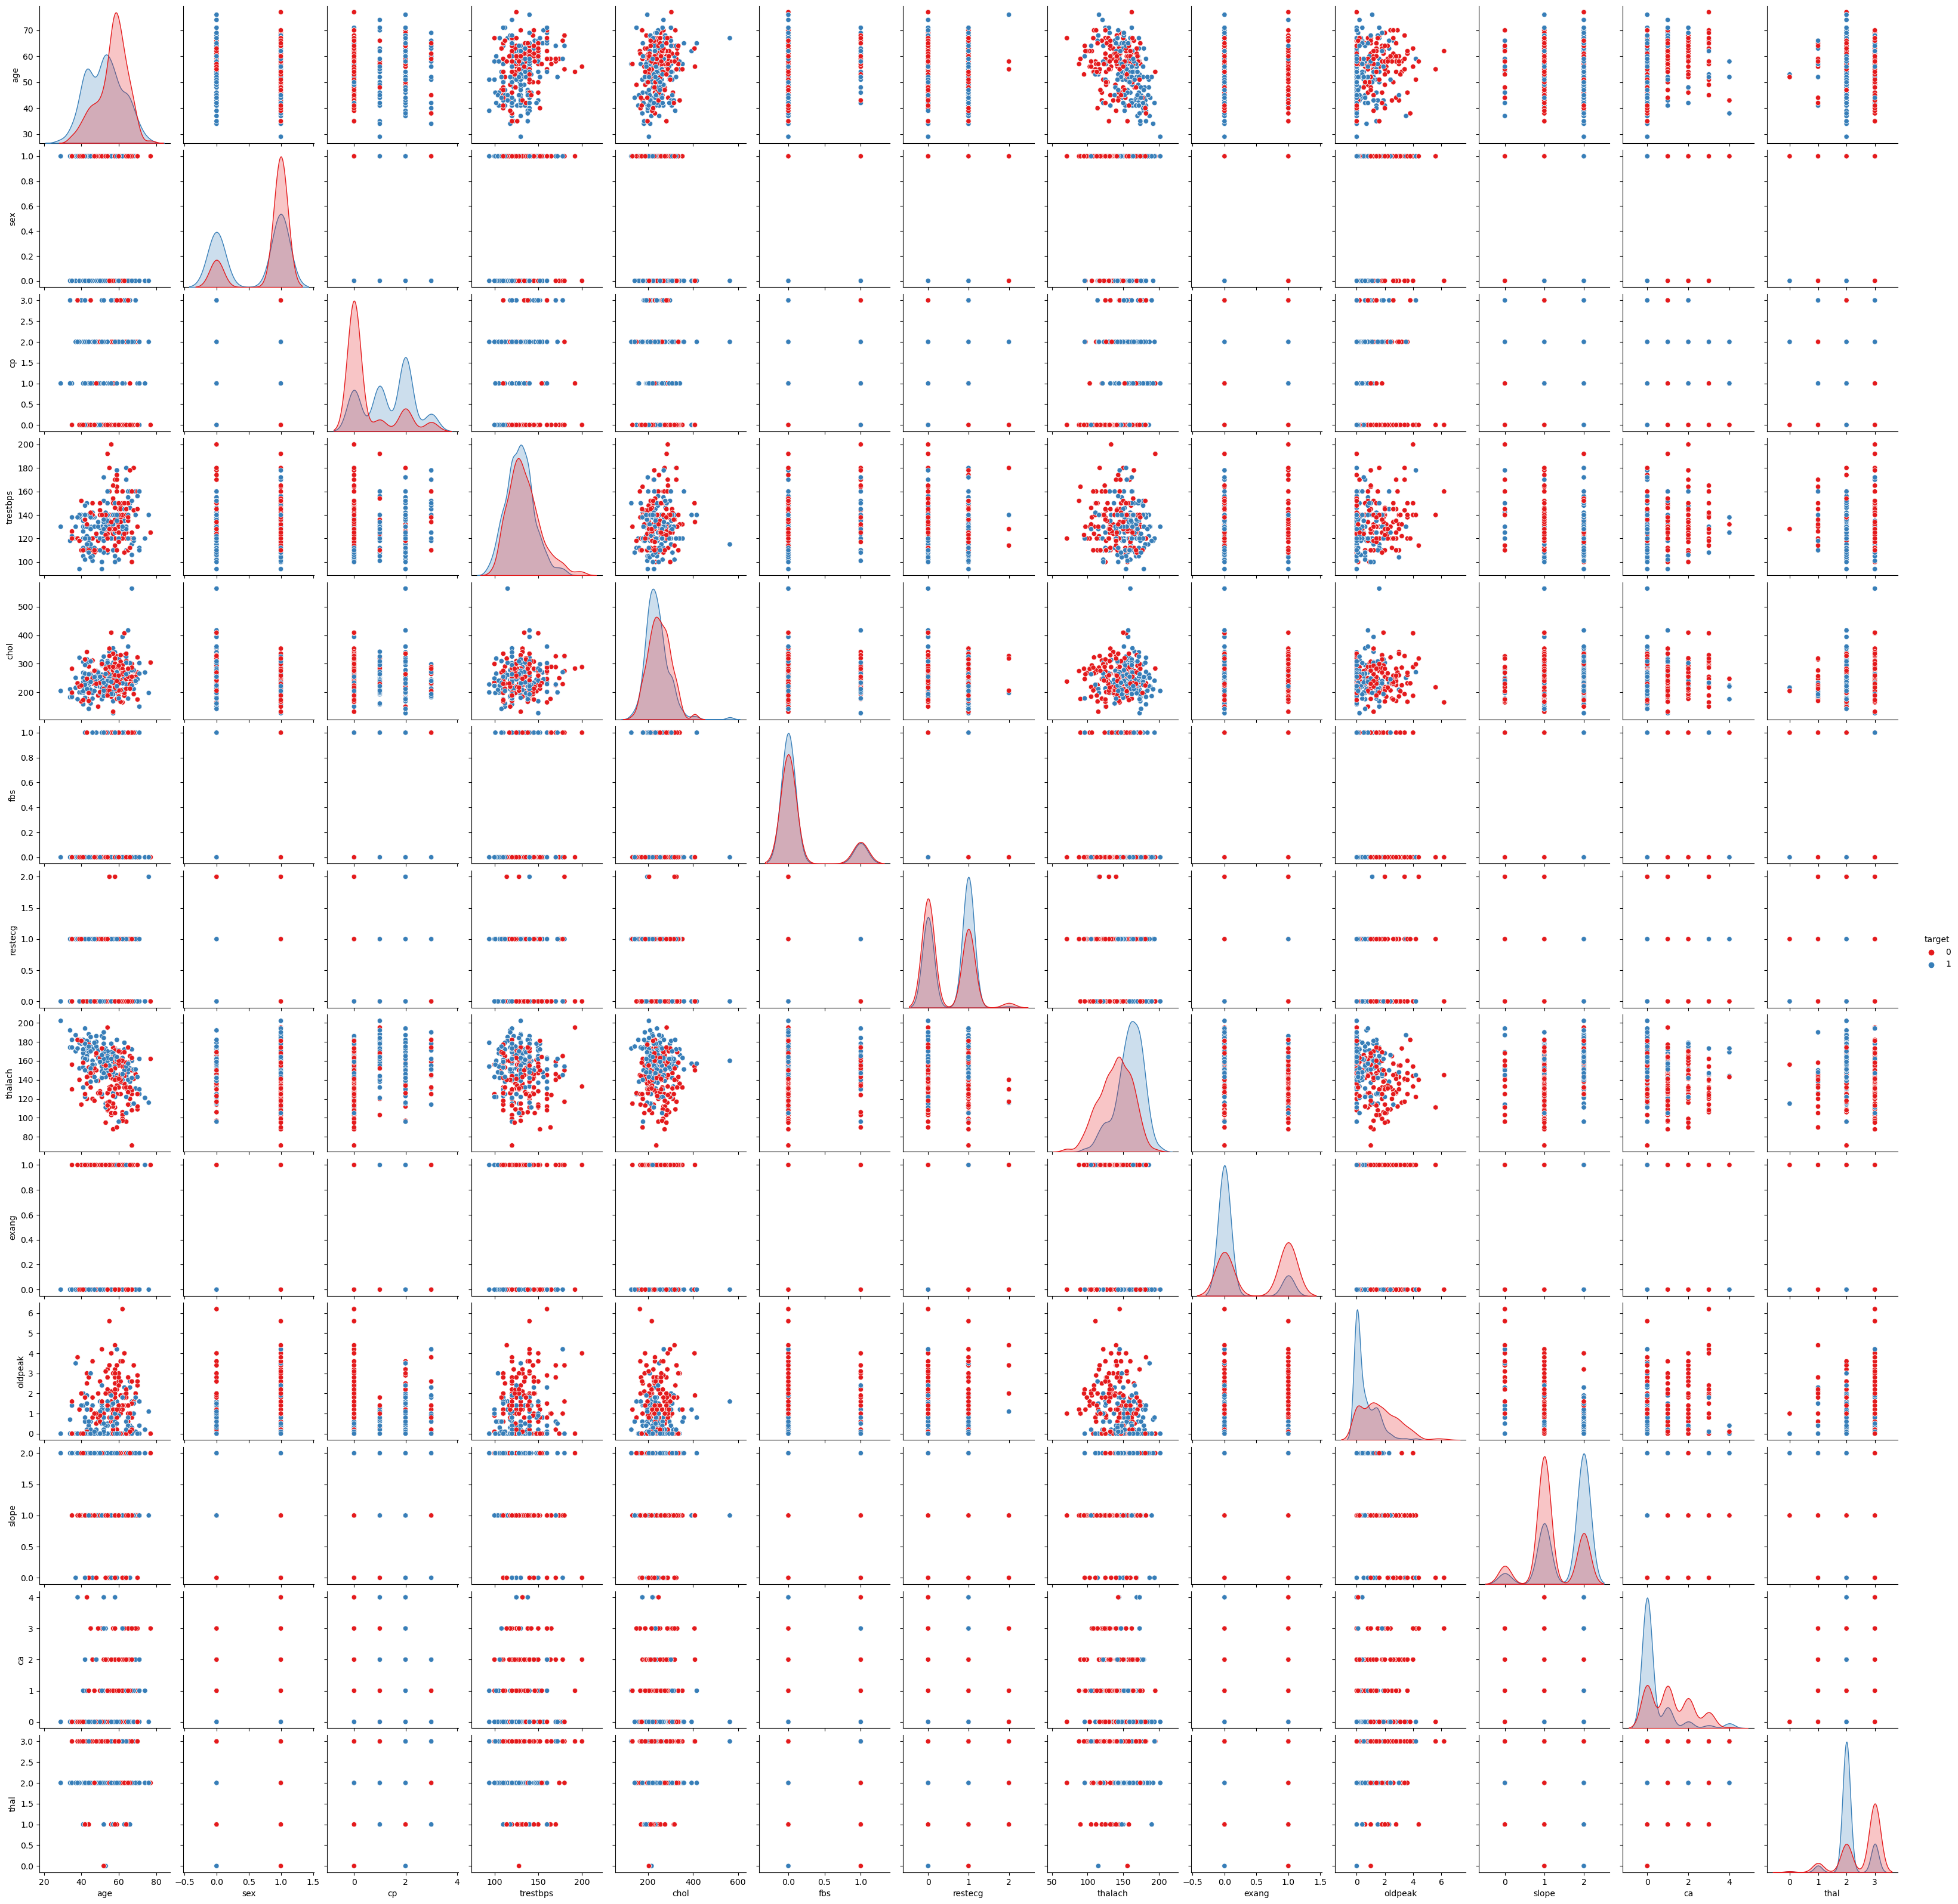

In [4]:
sn.pairplot(df,hue="target",palette="Set1")

<Axes: >

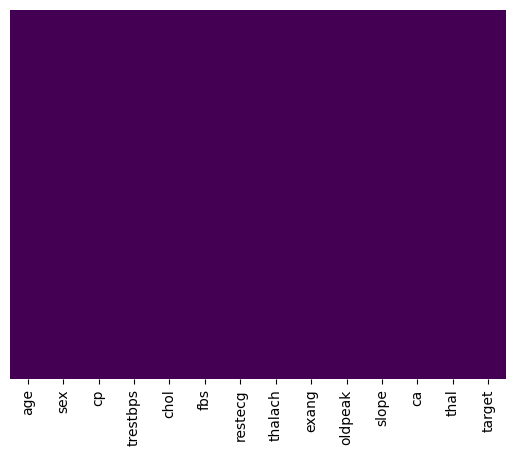

In [5]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=df.drop("target",axis=1)
y=df["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state=101)

Random Forest and Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
predictions = lr.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       170
           1       0.81      0.91      0.86       189

    accuracy                           0.84       359
   macro avg       0.85      0.84      0.84       359
weighted avg       0.85      0.84      0.84       359



Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
rfc=RandomForestClassifier()

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
predictions=rfc.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       170
           1       0.98      0.98      0.98       189

    accuracy                           0.98       359
   macro avg       0.98      0.98      0.98       359
weighted avg       0.98      0.98      0.98       359



In [27]:
n_estimators=[50,100,120,140]
max_features=[0.25,0.5,0.75,1.0]
max_depth=[4,8,10,None]
min_samples_split=[1,2,3,4]
max_samples=[0.5,0.75,1.0,None]

In [28]:
pr_grid_dict={"n_estimators":n_estimators,"max_features":max_features,
              "max_depth":max_depth,"min_samples_split":min_samples_split,
             "max_samples":max_samples}

In [29]:
print(pr_grid_dict)

{'n_estimators': [50, 100, 120, 140], 'max_features': [0.25, 0.5, 0.75, 1.0], 'max_depth': [4, 8, 10, None], 'min_samples_split': [1, 2, 3, 4], 'max_samples': [0.5, 0.75, 1.0, None]}


In [30]:
rfc_grid=GridSearchCV(estimator=rfc,
    param_grid=pr_grid_dict,
    scoring=None,
    n_jobs=-1,
    refit=True,
    cv=7,
    verbose=2,)

In [32]:
rfc_grid.fit(X_train,y_train)

Fitting 7 folds for each of 1024 candidates, totalling 7168 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1792 fits failed out of a total of 7168.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1792 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10, None],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'max_samples': [0.5, 0.75, 1.0, None],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 120, 140]},
             verbose=2)

In [33]:
rfc_grid.best_params_

{'max_depth': None,
 'max_features': 0.25,
 'max_samples': 1.0,
 'min_samples_split': 2,
 'n_estimators': 140}

In [35]:
rfc_grid.best_score_

0.9910087719298245

In [38]:
predictions=rfc_grid.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       170
           1       0.98      1.00      0.99       189

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359

